In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
salaries = pd.read_csv('Salaries.csv')

In [3]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [4]:
salaries.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [5]:
salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


C:\Users\Aric\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

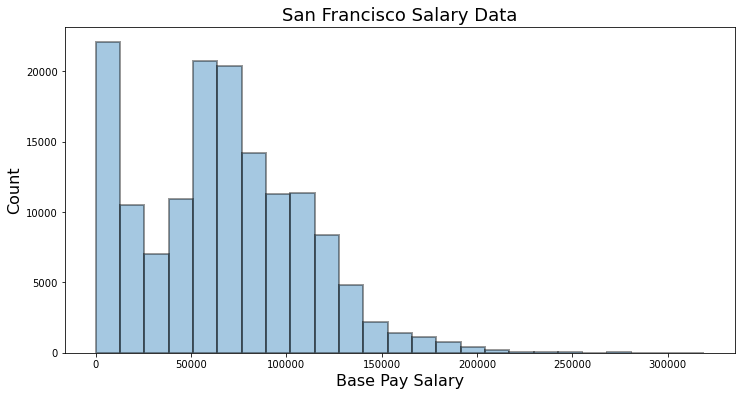

In [6]:
plt.figure(figsize=(12,6), )
sns.distplot(salaries['BasePay'], kde=False, bins=25, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('San Francisco Salary Data', fontsize=18)
plt.xlabel('Base Pay Salary', fontsize=16)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

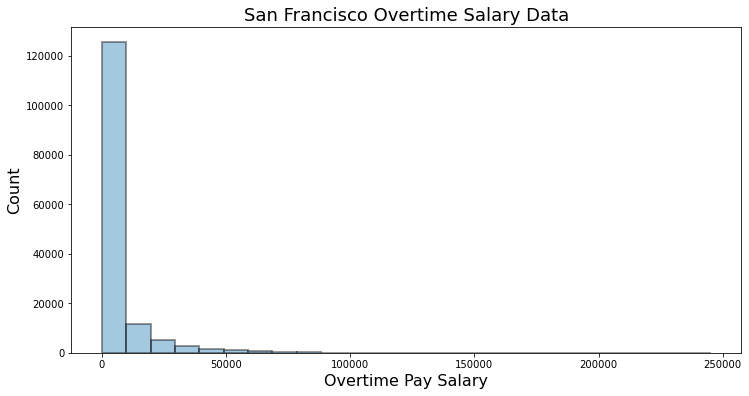

In [7]:
plt.figure(figsize=(12,6), )
sns.distplot(salaries['OvertimePay'], kde=False, bins=25, hist_kws=dict(edgecolor='black', linewidth=2))
plt.title('San Francisco Overtime Salary Data', fontsize=18)
plt.xlabel('Overtime Pay Salary', fontsize=16)
plt.ylabel('Count', fontsize=16)

In [8]:
# Person with the highest Total Pay
salaries.loc[[salaries['TotalPayBenefits'].argmax()]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [9]:
# Person with the lowest Total Pay
salaries.loc[[salaries['TotalPayBenefits'].argmin()]]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [10]:
# Average BasePay of all employees grouped by their year
salaries.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [15]:
unique_jobs = salaries['JobTitle'].nunique()

In [20]:
titles = salaries['JobTitle'].unique()
titles.sort()

print('NUMBER OF UNIQUE JOB TITLES: {}\n'.format(unique_jobs))
print('LIST OF JOB UNIQUE JOB TITLES')
print('-'*30)
for t in titles:
    print(t)
    

NUMBER OF UNIQUE JOB TITLES: 2159

LIST OF JOB UNIQUE JOB TITLES
------------------------------
ACCOUNT CLERK
ACCOUNTANT
ACCOUNTANT INTERN
ACPO,JuvP, Juv Prob (SFERS)
ACUPUNCTURIST
ADMINISTRATIVE ANALYST
ADMINISTRATIVE ANALYST II
ADMINISTRATIVE ANALYST III
ADMINISTRATIVE ENGINEER
ADMINISTRATIVE SERVICES MANAGER
ADMINISTRATOR, SFGH MEDICAL CENTER
AFFIRMATIVE ACTION SPECIALIST
AGRICULTURAL INSPECTOR
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPERATIONS
AIRPORT COMMUNICATIONS OPERATOR
AIRPORT COMMUNICATIONS SUPERVISOR
AIRPORT ECONOMIC PLANNER
AIRPORT ELECTRICIAN
AIRPORT ELECTRICIAN SUPERVISOR
AIRPORT EMERGENCY PLANNING COORDINATOR
AIRPORT MECHANICAL MAINTENANCE SUPERVISOR
AIRPORT NOISE ABATEMENT SPECIALIST
AIRPORT OPERATIONS SUPERVISOR
AIRPORT POLICE SERVICES AIDE
AIRPORT PROPERTY SPECIALIST I
AIRPORT SAFETY OFFICER
ANESTHETIST
ANIMAL CARE ASSISTANT SUPERVISOR
ANIMAL CARE ATTENDANT
ANIMAL CARE SUPERVISOR
ANIMAL CONTROL OFFICER
ANIMAL HEALTH TECHN

In [23]:
print("TOP 10 MOST COMMON JOBS")
print('-'*30)

salaries['JobTitle'].value_counts().head(10)

TOP 10 MOST COMMON JOBS
------------------------------


Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64